In [1]:
import duckdb
import pandas as pd
from statsbombpy import sb

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gravis as gv



In [2]:
con = duckdb.connect("example2.db")


In [3]:
passes = con.execute("SELECT * FROM events WHERE type = 'Pass'").df()


In [4]:

# columnsp = [
#     "match_id",
#     "competition",
#     "home_team",
#     "home_score",
#     "away_team",
#     "away_score",
#     "referee",
#     "team",
#     "possession",
#     "possession_time",
#     "minute",
#     "timestamp",
#     "player",
#     "position",
#     "position_most_played",
#     "x",
#     "y",
#     "pass_end_x",
#     "pass_end_y",
#     "pass_length",
#     "pass_recipient",
#     "pass_recipient_id",
#     "position_re_most_played",
#     "pass_recipient_position",
#     "player_shotFromPass",
#     "shot_type_shotFromPass",
#     "shot_outcome_shotFromPass",
#     "shot_statsbomb_xg_shotFromPass",
#     "pass_succes",
#     "pass_outcome",
#     "f3rd_pass",
#     "pass_progression",
#     "shot_assisted_pass",
#     "goal_assisted_pass",
#     "cross",
#     "box_pass",
#     "SequenceID",
#     "InSequenceID",
#     "SequenceType",
#     "SequenceXG",
#     "SequenceBuildUpXG",
#     "time_past"
# ]

# pdf=passes[columnsp]



In [14]:

columnsp = [
    "match_id",
    "competition",
    "home_team",
    "home_score",
    "away_team",
    "away_score",
    "referee",
    "team",
    "possession",
    "possession_time",
    "minute",
    "timestamp",
    "player",
    "position",
    "position_most_played",
    "x",
    "y",
    "pass_end_x",
    "pass_end_y",
    "pass_length",
    "pass_recipient",
    "pass_recipient_id",
    "position_re_most_played",
    "pass_recipient_position",
    "player_shotFromPass",
    "shot_type_shotFromPass",
    "shot_outcome_shotFromPass",
    "shot_statsbomb_xg_shotFromPass",
    "SequenceBuildUpXG",
    "pass_succes",
    "pass_outcome",
]

pdf=passes[columnsp]



In [6]:
pdf[["match_id","home_team","home_score","away_team","away_score"]].drop_duplicates().tail(10)

,match_id,home_team,home_score,away_team,away_score
355015,267327,Barcelona,4,Real Betis,0
355987,266166,Atlético Madrid,1,Barcelona,2
357095,266160,Levante UD,0,Barcelona,2
358063,265839,Barcelona,2,Sevilla,1
359122,266424,Real Madrid,0,Barcelona,4
360279,266467,Celta Vigo,4,Barcelona,1
361210,267273,Las Palmas,1,Barcelona,2
362348,266490,Barcelona,4,Levante UD,1
363388,266254,Barcelona,6,Celta Vigo,1
364302,266557,Barcelona,1,Valencia,2


In [7]:
pdf.head(5)

,match_id,competition,home_team,home_score,away_team,away_score,referee,team,possession,possession_time,...,pass_recipient,pass_recipient_id,position_re_most_played,pass_recipient_position,player_shotFromPass,shot_type_shotFromPass,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,pass_outcome
0,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,145,29.612,...,None,NaN,None,None,None,None,None,NaN,NaN,Injury Clearance
1,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Levante UD,146,0.123,...,None,NaN,None,None,None,None,None,NaN,NaN,Injury Clearance
2,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,2,19.824,...,Borja González Tomás,6566.0,Center Forward,None,None,None,None,NaN,True,None
3,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,2,19.824,...,Daniel García Carrillo,6775.0,Left Defensive Midfield,None,None,None,None,NaN,True,None
4,3825848,Spain - La Liga,Levante UD,2,Eibar,2,None,Eibar,2,19.824,...,Aleksandar Pantić,27239.0,Left Center Back,None,None,None,None,NaN,True,None


In [19]:
# pdf["SequenceXG"] = pd.to_numeric(pdf["SequenceXG"], errors="coerce")
pdf["SequenceBuildUpXG"] = pd.to_numeric(pdf["SequenceBuildUpXG"], errors="coerce")


/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_2684/902182536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf["SequenceBuildUpXG"] = pd.to_numeric(pdf["SequenceBuildUpXG"], errors="coerce")


In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def network_creation(match_pass_data):
    # Create a copy of the match_pass_data to avoid modifying the original DataFrame
    df = match_pass_data.copy()

    # Only keep successful passes with valid recipients
    df = df[(df['pass_succes']) & (df['pass_recipient'].notna())]

    # Initialize a directed graph
    G = nx.DiGraph()

    # Add edges with weights to the graph
    for _, row in df.iterrows():
        if G.has_edge(row['player'], row['pass_recipient']):
            # Increment weight if the edge already exists
            G[row['player']][row['pass_recipient']]['weight'] += 0.01
        else:
            # Add edge with an initial weight of 1
            G.add_edge(row['player'], row['pass_recipient'], weight=0.1)

    # Calculate centrality measures
    try:
        degree_centrality = nx.degree_centrality(G)
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
        closeness_centrality = nx.closeness_centrality(G)
        betweenness_centrality = nx.betweenness_centrality(G)
    except nx.PowerIterationFailedConvergence:
        print("Error: Eigenvector centrality did not converge. Check the graph structure.")

    # Convert centrality measures to DataFrames
    degree_c = pd.DataFrame(list(degree_centrality.items()), columns=['player', 'degree_c'])
    eigen_c = pd.DataFrame(list(eigenvector_centrality.items()), columns=['player', 'eigen_c'])
    closeness_c = pd.DataFrame(list(closeness_centrality.items()), columns=['player', 'closeness_c'])
    betweenness_c = pd.DataFrame(list(betweenness_centrality.items()), columns=['player', 'betweenness_c'])
    
    #print(df["pass_succes"].unique())    # Perform left joins with the main DataFrame to add centrality measures
    
    result_df = df.merge(degree_c, on='player', how='left')
    result_df = result_df.merge(eigen_c, on='player', how='left')
    result_df = result_df.merge(closeness_c, on='player', how='left')
    result_df = result_df.merge(betweenness_c, on='player', how='left')
    #print(result_df["pass_succes"].unique())    # Perform left joins with the main DataFrame to add centrality measures


    # Return the graph and the updated DataFrame
    return G, result_df


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

def network_viz(df, G):
    # Compute player positions
    pass_positions = df[['player', 'x', 'y']].rename(columns={'x': 'pos_x', 'y': 'pos_y'})
    receive_positions = df[['pass_recipient', 'pass_end_x', 'pass_end_y']].rename(
        columns={'pass_recipient': 'player', 'pass_end_x': 'pos_x', 'pass_end_y': 'pos_y'}
    )

    # Combine pass and receive positions
    all_positions = pd.concat([pass_positions, receive_positions], ignore_index=True)

    # Calculate average positions
    average_positions_df = all_positions.groupby('player')[['pos_x', 'pos_y']].mean()

    # Convert to dictionary for NetworkX
    average_positions = average_positions_df.apply(lambda row: (row['pos_x'], row['pos_y']), axis=1).to_dict()

    # Get edge weights for visualization (scaled for thickness)
    edges = G.edges(data=True)
    weights = [data['weight'] for _, _, data in edges]  # Extract weights from edges
    weights = [w * 1 for w in weights]  # Scale weights for better visibility

    # Visualization
    fig, ax = plt.subplots(figsize=(10, 8))

    # Add background field image
    try:
        field_image = plt.imread("pitch.png")  # Path to the football field image
        ax.imshow(field_image, extent=[0, 120, 80, 0], zorder=0)  # Adjust to field dimensions
    except FileNotFoundError:
        print("Field image not found. Please ensure 'pitch.png' is in the correct path.")

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, average_positions, node_size=300, node_color="skyblue", ax=ax)
    nx.draw_networkx_labels(G, average_positions, font_size=10, font_color="black", ax=ax)
    nx.draw_networkx_edges(
        G, average_positions, edge_color="gray", width=weights, arrowstyle='->', arrowsize=15, ax=ax
    )

    # Axis settings
    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.set_axis_off()  # Hide axes
    ax.invert_yaxis()  # Invert y-axis to match football field orientation

    plt.title("Passing Network with Edge Thickness by Pass Count")
    plt.show()


In [11]:

def agg_players(data,flag=0):
    # flag 0: takım
    # flag 1: oyuncu takım
    # flag 2: mevki takım  
    arr=[]
    if flag==0:
        arr.append("team")
    elif flag==1:
        arr.append("player")
        arr.append("team")
    elif flag==2:
        arr.append("position_most_played")
        arr.append("team")

    # Aggregation dictionary
    agg_dict = {
        'position': lambda x: x.mode()[0] if not x.mode().empty else None,
        'pass_length': 'mean',
        'pass_progression': 'mean',
        "possession_time":['sum',"mean"],
        'InSequenceID': 'mean',
        'time_past': 'mean',
        'degree_c': 'mean',
        'eigen_c': 'mean',
        'closeness_c': 'mean',
        'betweenness_c': 'mean',
        'pass_recipient': lambda x: x.mode()[0] if not x.mode().empty else None,
        'pass_recipient_position': lambda x: x.mode()[0] if not x.mode().empty else None,
        'shot_statsbomb_xg_shotFromPass': 'sum',
        'SequenceXG': 'sum',
        'SequenceBuildUpXG': 'sum',
        'pass_succes': "count",
        'f3rd_pass': 'sum',
        'shot_assisted_pass': 'sum',
        'goal_assisted_pass': 'sum',
        'cross': 'sum',
        'box_pass': 'sum',
        'match_id': 'mean'  # Unique count of match IDs

    }

    by_player = data.groupby(arr).agg(agg_dict)

    by_player.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in by_player.columns]

    # Reset the index for better readability
    by_player = by_player.reset_index()

    # Calculate pass success per total possession time
    #by_player['pass_rate'] = by_player['pass_succes_sum'] / by_player['possession_time_sum']

    return by_player




### Network oluşturma

In [20]:
# Dictionaries to store data
team_graphs = {}      # To store NetworkX graphs
team_dataframes = {}  # To store DataFrames
all_teams_dataframe = pd.DataFrame()

# Iterate over unique teams and populate the dictionaries
for team in pdf.team.unique():
    season_network, season_network_DF = network_creation(pdf[pdf["team"] == team])
    team_graphs[team] = season_network
    team_dataframes[team] = season_network_DF
    all_teams_dataframe = pd.concat([all_teams_dataframe, season_network_DF], ignore_index=True)

# Access data by team name
team_name = "Barcelona"  # Replace with the desired team name



In [21]:
df = team_dataframes[team_name][["player","match_id","degree_c", "eigen_c", "closeness_c", "betweenness_c","shot_statsbomb_xg_shotFromPass","SequenceBuildUpXG"]]
df

,player,match_id,degree_c,eigen_c,closeness_c,betweenness_c,shot_statsbomb_xg_shotFromPass,SequenceBuildUpXG
0,Neymar da Silva Santos Junior,3825660,1.833333,0.230461,0.960000,0.013850,NaN,NaN
1,Luis Alberto Suárez Díaz,3825660,1.708333,0.226338,0.923077,0.007705,NaN,NaN
2,Sergio Busquets i Burgos,3825660,1.750000,0.221558,0.888889,0.004933,NaN,NaN
3,Andrés Iniesta Luján,3825660,1.708333,0.221558,0.888889,0.003409,NaN,NaN
4,Jérémy Mathieu,3825660,1.708333,0.213598,0.857143,0.003409,NaN,NaN
...,...,...,...,...,...,...,...,...
22127,Ivan Rakitić,266557,1.875000,0.226338,0.923077,0.042719,NaN,NaN
22128,Sergio Busquets i Burgos,266557,1.750000,0.221558,0.888889,0.004933,NaN,NaN
22129,Jordi Alba Ramos,266557,1.833333,0.214830,0.888889,0.016070,NaN,NaN
22130,Luis Alberto Suárez Díaz,266557,1.708333,0.226338,0.923077,0.007705,NaN,0.0


In [22]:
df = all_teams_dataframe[["player","match_id","degree_c", "eigen_c", "closeness_c", "betweenness_c","shot_statsbomb_xg_shotFromPass","SequenceBuildUpXG"]]
df

,player,match_id,degree_c,eigen_c,closeness_c,betweenness_c,shot_statsbomb_xg_shotFromPass,SequenceBuildUpXG
0,Adrián González Morales,3825848,1.846154,0.229477,0.928571,0.037141,NaN,NaN
1,Borja González Tomás,3825848,1.730769,0.235909,0.962963,0.018717,NaN,NaN
2,Daniel García Carrillo,3825848,1.884615,0.234545,0.928571,0.029844,NaN,NaN
3,Aleksandar Pantić,3825848,1.615385,0.199169,0.787879,0.005694,NaN,NaN
4,Mauro Javier Dos Santos,3825848,1.846154,0.227825,0.896552,0.024964,NaN,NaN
...,...,...,...,...,...,...,...,...
276758,Ivan Rakitić,266557,1.875000,0.226338,0.923077,0.042719,NaN,NaN
276759,Sergio Busquets i Burgos,266557,1.750000,0.221558,0.888889,0.004933,NaN,NaN
276760,Jordi Alba Ramos,266557,1.833333,0.214830,0.888889,0.016070,NaN,NaN
276761,Luis Alberto Suárez Díaz,266557,1.708333,0.226338,0.923077,0.007705,NaN,0.0


In [32]:
# Aggregation dictionary
agg_dict = {
    'degree_c': 'mean',
    'eigen_c': 'mean',
    "closeness_c":"mean",
    'betweenness_c': 'mean',
    'shot_statsbomb_xg_shotFromPass': 'sum',
    'SequenceBuildUpXG': 'sum',

}

by_player = df.groupby(["player","match_id"]).agg(agg_dict)
by_player = by_player.reset_index()

agg_dict = {
    'degree_c': 'mean',
    'eigen_c': 'mean',
    "closeness_c":"mean",
    'betweenness_c': 'mean',
    'shot_statsbomb_xg_shotFromPass': 'sum',
    'SequenceBuildUpXG': 'sum',

}
by_player = by_player.groupby("player").agg(agg_dict)
by_player = by_player.reset_index()
by_player

,player,degree_c,eigen_c,closeness_c,betweenness_c,shot_statsbomb_xg_shotFromPass,SequenceBuildUpXG
0,Abdoul Karim Yoda,1.615385,0.210081,0.866667,0.002409,0.434431,2.249535
1,Abdoulaye Doucouré,1.370370,0.171872,0.750000,0.001477,0.615640,2.097704
2,Abraham González Casanova,1.560000,0.189383,0.833333,0.002851,2.334519,4.195373
3,Adalberto Peñaranda Maestre,1.592593,0.196177,0.818182,0.004457,2.263150,0.617804
4,Aderllan Leandro de Jesus Santos,1.655172,0.188509,0.828571,0.029203,0.030815,1.803040
...,...,...,...,...,...,...,...
533,Íñigo Lekue Martínez,1.875000,0.221813,0.960000,0.007572,0.585020,1.930899
534,Íñigo Martínez Berridi,1.730769,0.211547,0.866667,0.008227,0.286110,7.190235
535,Óliver Torres Muñoz,1.833333,0.224816,0.923077,0.009136,1.185552,2.849200
536,Óscar Esau Duarte Gaitán,1.440000,0.176130,0.781250,0.003070,0.069180,1.681381


In [39]:
import openpyxl

by_player.to_excel('players_pass_data.xlsx', index=False, sheet_name='Stats')


In [33]:

import pandas as pd

# Define the columns to check for outliers
columns = ["degree_c", "eigen_c", "closeness_c", "betweenness_c", "shot_statsbomb_xg_shotFromPass","SequenceBuildUpXG"]

# Function to remove outliers based on IQR
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows with outliers in the column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove rows with outliers
cleaned_df = remove_outliers(by_player, columns)

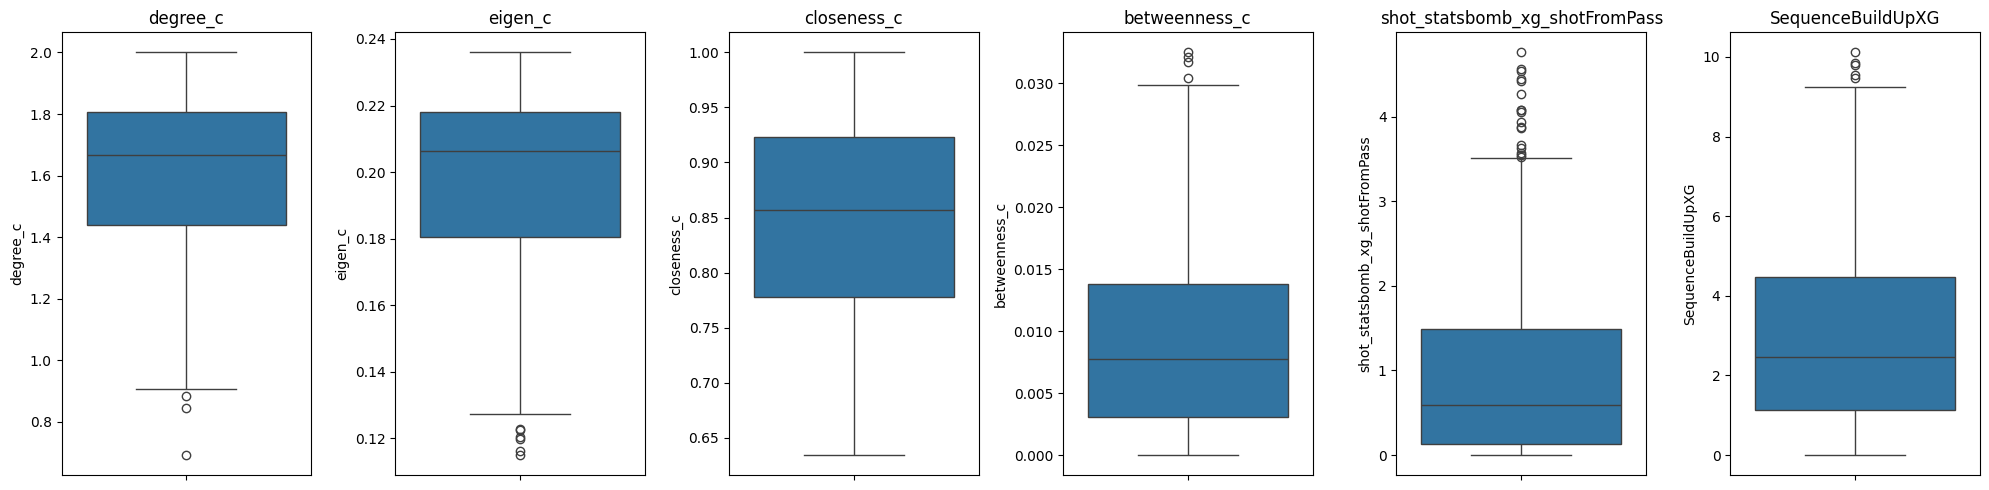

In [34]:
columns = ["degree_c", "eigen_c", "closeness_c", "betweenness_c", "shot_statsbomb_xg_shotFromPass","SequenceBuildUpXG"]

# Set up the figure and axes
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5), sharey=False)  # Set sharey=False for independent y-axes

# Create a boxplot for each column
for i, col in enumerate(columns):
    sns.boxplot(data=cleaned_df[col], ax=axes[i])
    axes[i].set_title(col)  # Set title for each plot

# Adjust layout
plt.tight_layout()
plt.show()

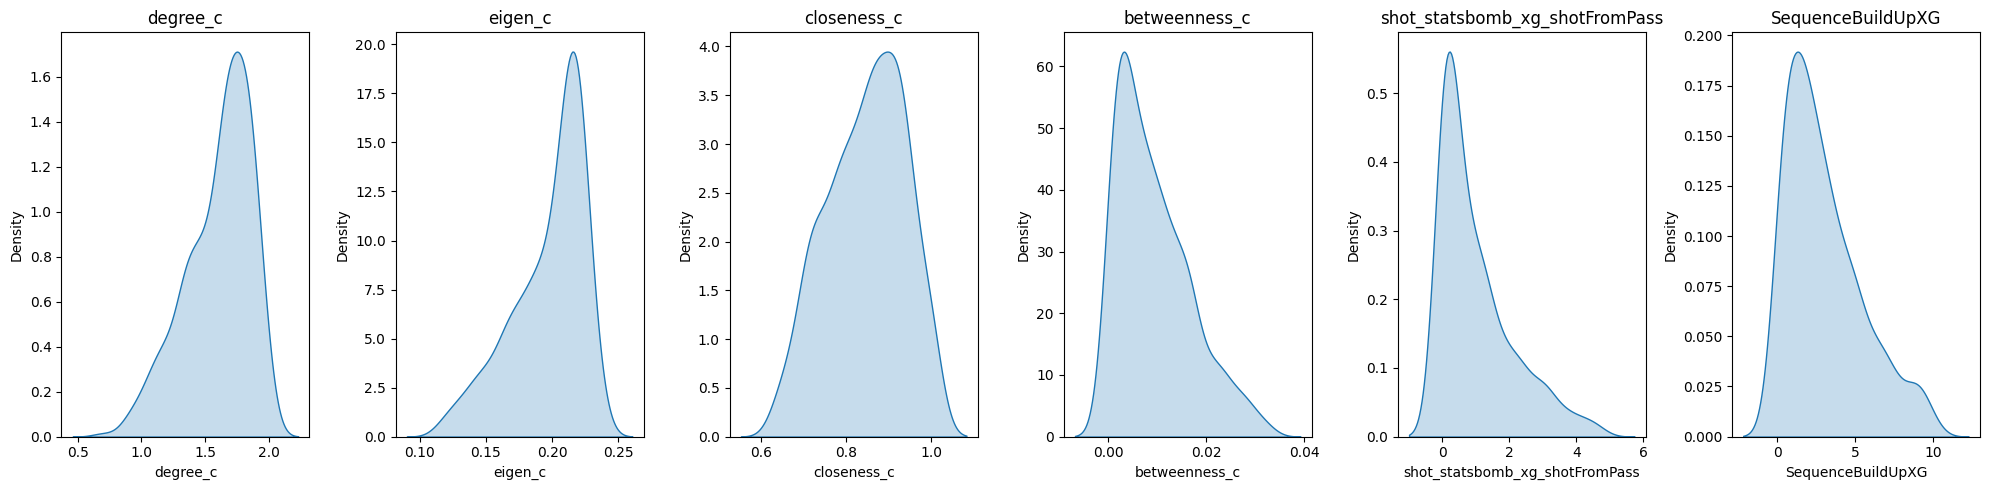

In [35]:
# Set up the figure and axes
fig, axes = plt.subplots(1, len(columns), figsize=(20, 5), sharey=False)  # 1 row, len(columns) columns

# Plot KDE for each column
for i, col in enumerate(columns):
    sns.kdeplot(data=cleaned_df[col], ax=axes[i], fill=True)
    axes[i].set_title(col)  # Set title for each plot

# Adjust layout
plt.tight_layout()
plt.show()

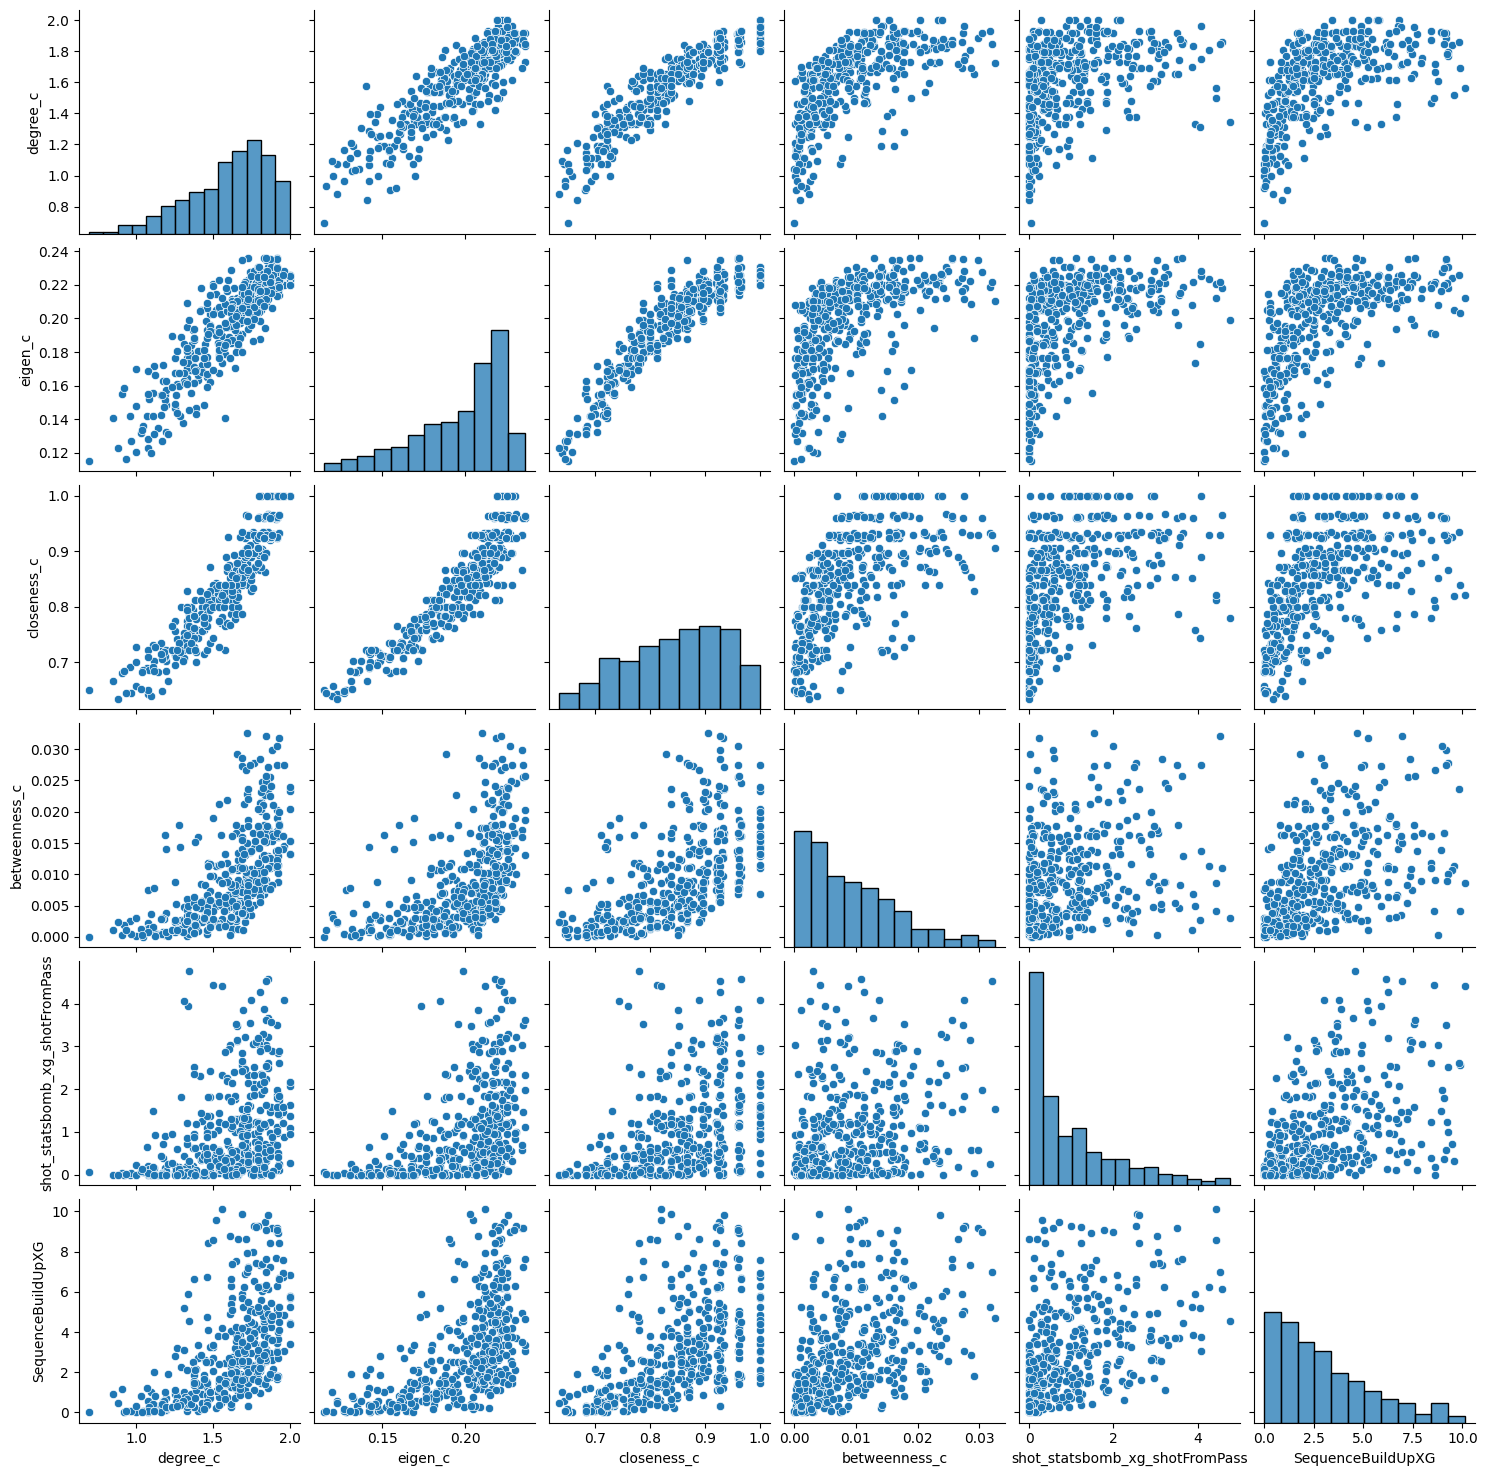

In [36]:
sns.pairplot(cleaned_df[columns])


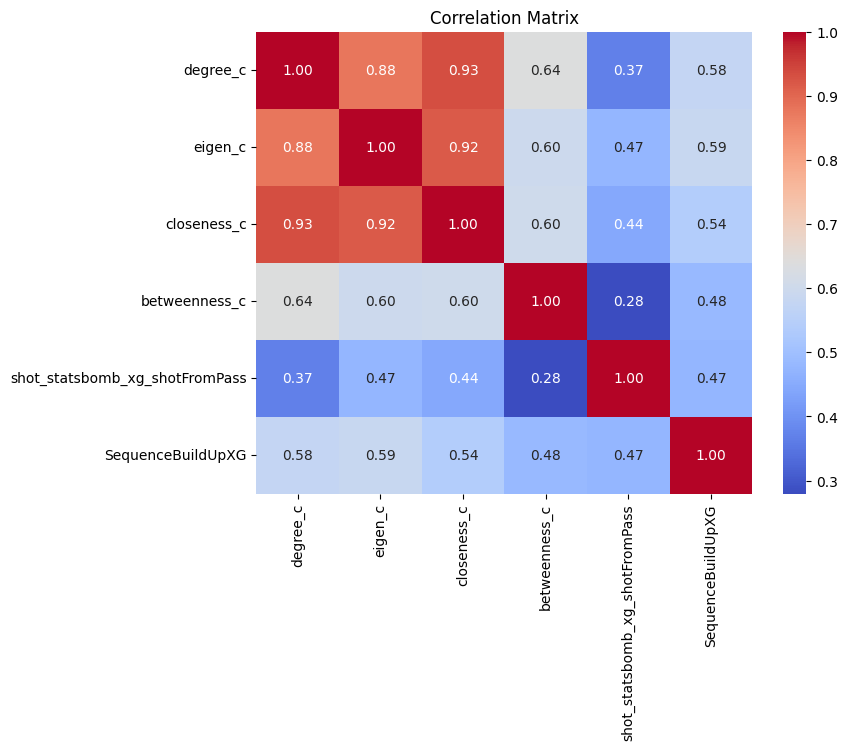

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini bir heatmap ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_df[columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

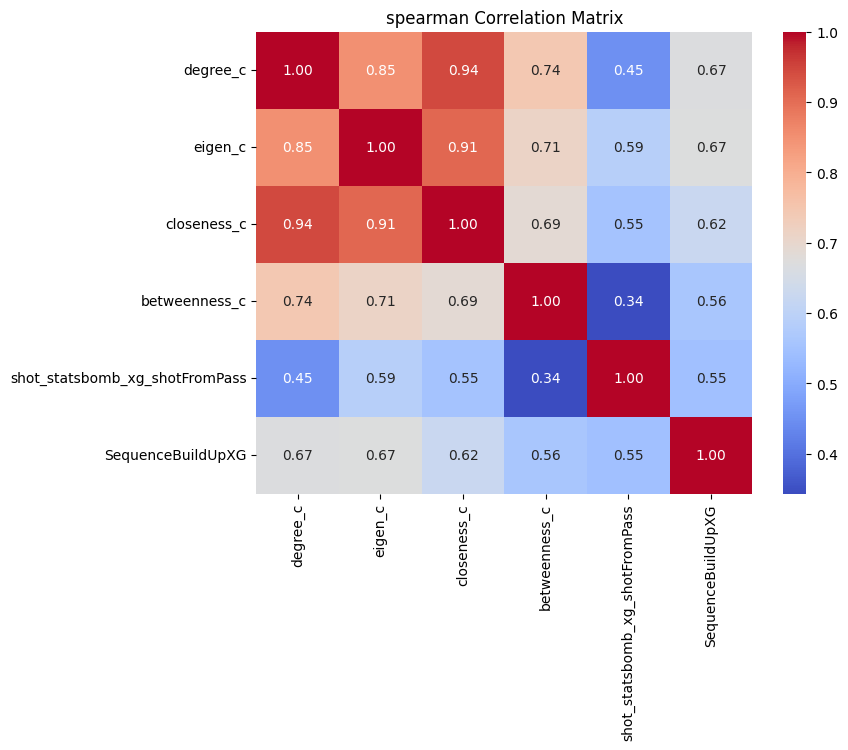

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini bir heatmap ile görselleştir
plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_df[columns].corr(method="spearman"), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("spearman Correlation Matrix")
plt.show()

 ### **Görselleştirme**

In [557]:

team_name = "Barcelona"  # Replace with the desired team name

team_graphs[team_name].nodes(data=True)

NodeDataView({'Neymar da Silva Santos Junior': {}, 'Luis Alberto Suárez Díaz': {}, 'Sergio Busquets i Burgos': {}, 'Andrés Iniesta Luján': {}, 'Jérémy Mathieu': {}, 'Gerard Piqué Bernabéu': {}, 'Jordi Alba Ramos': {}, 'Daniel Alves da Silva': {}, 'Sergi Roberto Carnicer': {}, 'Munir El Haddadi Mohamed': {}, 'Claudio Andrés Bravo Muñoz': {}, 'Marc Bartra Aregall': {}, 'Sandro Ramírez Castillo': {}, 'Javier Alejandro Mascherano': {}, 'Ivan Rakitić': {}, 'Douglas Pereira dos Santos': {}, 'Gerard Gumbau Garriga': {}, 'Aleix Vidal Parreu': {}, 'Arda Turan': {}, 'Lionel Andrés Messi Cuccittini': {}, 'Sergi Samper Montaña': {}, 'Thomas Vermaelen': {}, 'Marc-André ter Stegen': {}, 'Adriano Correia Claro': {}, 'Rafael Alcântara do Nascimento': {}})

In [558]:
team_graphs[team_name].edges(data=True)

OutEdgeDataView([('Neymar da Silva Santos Junior', 'Luis Alberto Suárez Díaz', {'weight': 1.7800000000000014}), ('Neymar da Silva Santos Junior', 'Jordi Alba Ramos', {'weight': 2.619999999999988}), ('Neymar da Silva Santos Junior', 'Sergio Busquets i Burgos', {'weight': 1.0200000000000007}), ('Neymar da Silva Santos Junior', 'Andrés Iniesta Luján', {'weight': 2.6899999999999866}), ('Neymar da Silva Santos Junior', 'Daniel Alves da Silva', {'weight': 0.8400000000000006}), ('Neymar da Silva Santos Junior', 'Sergi Roberto Carnicer', {'weight': 0.9600000000000007}), ('Neymar da Silva Santos Junior', 'Gerard Piqué Bernabéu', {'weight': 0.42000000000000026}), ('Neymar da Silva Santos Junior', 'Jérémy Mathieu', {'weight': 0.4500000000000003}), ('Neymar da Silva Santos Junior', 'Munir El Haddadi Mohamed', {'weight': 0.28000000000000014}), ('Neymar da Silva Santos Junior', 'Javier Alejandro Mascherano', {'weight': 0.6000000000000004}), ('Neymar da Silva Santos Junior', 'Ivan Rakitić', {'weight'

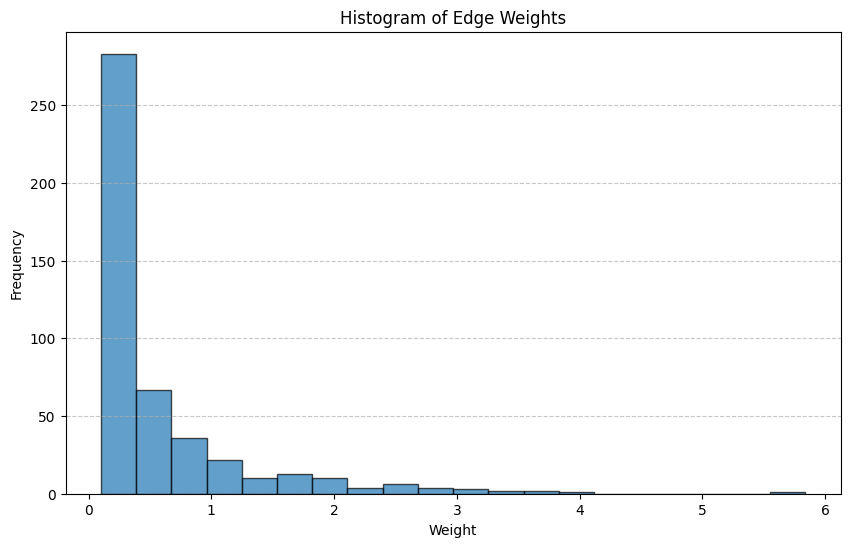

In [559]:
# Extract weights from the graph
weights = [data['weight'] for _, _, data in team_graphs[team_name].edges(data=True)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(weights, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Edge Weights")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [560]:
mean_weight = np.mean(weights)
std_weight = np.std(weights)
percentile_25 = np.percentile(weights, 25)
percentile_50 = np.percentile(weights, 50)
percentile_75 = np.percentile(weights, 75)

print(f"Mean: {mean_weight}")
print(f"Standard Deviation: {std_weight}")
print(f"25th Percentile: {percentile_25}")
print(f"50th Percentile (Median): {percentile_50}")
print(f"75th Percentile: {percentile_75}")


Mean: 0.566982758620689
Standard Deviation: 0.7220176110990728
25th Percentile: 0.14
50th Percentile (Median): 0.27000000000000013
75th Percentile: 0.6700000000000005


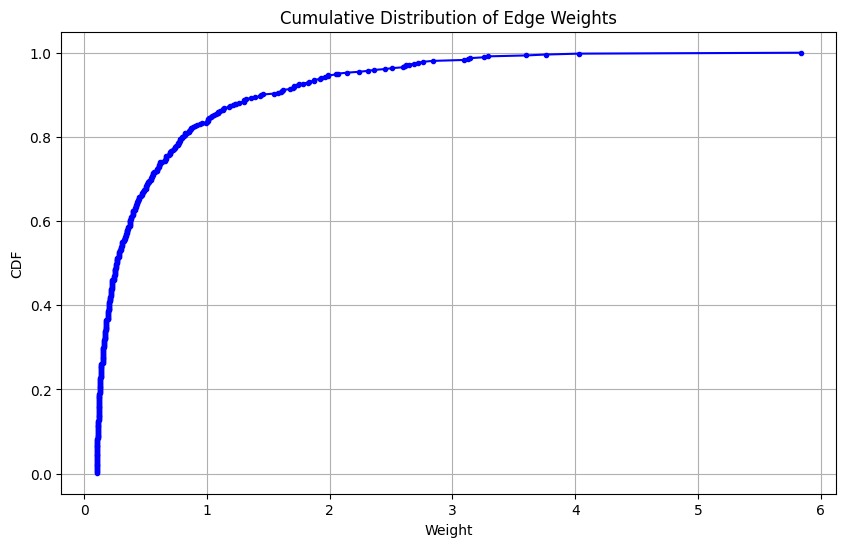

In [561]:
# Sort weights and calculate CDF
sorted_weights = np.sort(weights)
cdf = np.arange(1, len(sorted_weights) + 1) / len(sorted_weights)

# Plot CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_weights, cdf, marker='.', linestyle='-', color='blue')
plt.title("Cumulative Distribution of Edge Weights")
plt.xlabel("Weight")
plt.ylabel("CDF")
plt.grid()
plt.show()


In [545]:
# Calculate IQR
q1 = np.percentile(weights, 25)
q3 = np.percentile(weights, 75)
iqr = q3 - q1

# Define a threshold (lower bound)
lower_bound = q1 - 0.1 * iqr
print(f"Threshold based on IQR: {lower_bound}")


Threshold based on IQR: 0.10699999999999998


In [ ]:
import networkx as nx

# Define your threshold
threshold = 0.5  # Replace with your chosen threshold value

# Create a new graph by filtering edges based on the threshold
filtered_graph = nx.DiGraph()  # Change to nx.DiGraph() if working with directed graphs
filtered_graph.add_nodes_from(team_graphs[team_name].nodes(data=True))  # Add all nodes and their attributes

# Add only edges with weight >= threshold
filtered_graph.add_edges_from(
    (u, v, d) for u, v, d in team_graphs[team_name].edges(data=True) if d['weight'] >= threshold
)

# Add labels for edge weights (for visualization in Gravis)
for u, v, data in filtered_graph.edges(data=True):
    data['label'] = f"Weight: {data['weight']}"  # Add weight as a label


gv.d3(filtered_graph)

In [567]:
def assign_properties(g):
    # Centrality calculation
    node_centralities = nx.eigenvector_centrality(g)
    edge_centralities = nx.edge_betweenness_centrality(g)

    # Community detection
    communities = nx.algorithms.community.greedy_modularity_communities(g)

    # Graph properties
    g.graph['node_border_size'] = 1.5
    g.graph['node_border_color'] = 'white'
    g.graph['edge_opacity'] = 0.9

    # Node properties: Size by centrality, shape by size, color by community
    colors = ['red', 'blue', 'green', 'orange', 'pink', 'brown', 'yellow', 'cyan', 'magenta', 'violet']
    for node_id in g.nodes:
        node = g.nodes[node_id]
        node['size'] = 10 + node_centralities[node_id] * 100
        node['shape'] = 'circle' if node['size'] > 30 else 'circle'
        for community_counter, community_members in enumerate(communities):
            if node_id in community_members:
                break
        node['color'] = colors[community_counter % len(colors)]

    # Edge properties: Size by centrality, color by community (within=community color, between=black)
    for edge_id in g.edges:
        edge =  g.edges[edge_id]
        source_node = g.nodes[edge_id[0]]
        target_node = g.nodes[edge_id[1]]
        edge['size'] = edge_centralities[edge_id] * 100
        edge['color'] = source_node['color'] if source_node['color'] == target_node['color'] else 'black'


In [568]:
assign_properties(team_graphs[team_name])

gv.d3(team_graphs[team_name])

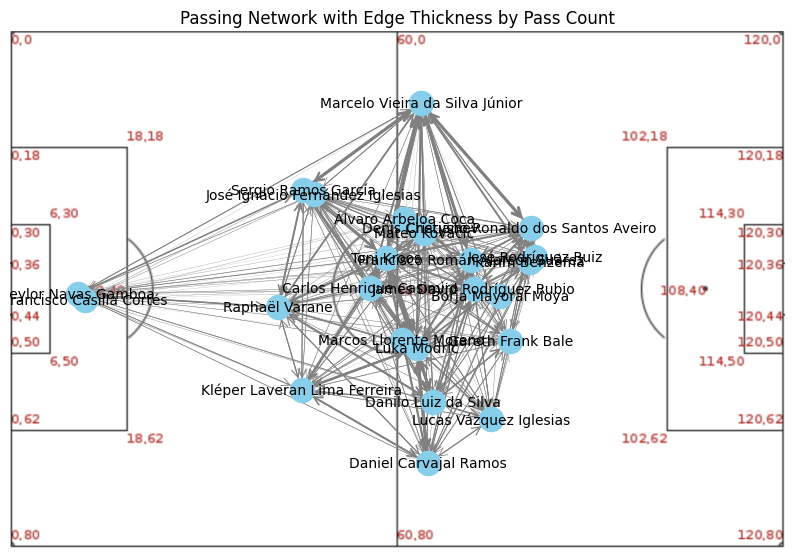

In [519]:
network_viz(season_network_DF,season_network)

In [502]:
season_network_DF.shape


(276763, 46)

In [507]:
season_network_DF[season_network_DF["player"]=="Francisco Medina Luna"]["team"].unique()

array(['Rayo Vallecano', 'Granada'], dtype=object)

In [ ]:

gv.d3(season_network)


### Test

In [476]:
df_network = pdf[pdf["match_id"]==266424].copy()
home = df_network["home_team"].unique()[0]
away = df_network["away_team"].unique()[0]

In [473]:
df_network[df_network["team"]==home]

,match_id,competition,home_team,home_score,away_team,away_score,referee,team,possession,possession_time,...,shot_assisted_pass,goal_assisted_pass,cross,box_pass,SequenceID,InSequenceID,SequenceType,SequenceXG,SequenceBuildUpXG,time_past
359123,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,30,2.380,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
359125,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,35,1.766,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
359127,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,80,1.589,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN
359142,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,4,4.487,...,False,False,False,False,3.0,1.0,Shot,NaN,NaN,0.000
359143,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,4,4.487,...,False,False,False,False,3.0,2.0,Shot,NaN,NaN,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360248,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,96,2772.583,...,False,False,False,False,251.0,1.0,Shot,NaN,0.0,0.000
360251,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,200,3.673,...,False,False,False,False,253.0,1.0,Shot,NaN,0.0,0.000
360253,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,201,2.856,...,False,False,False,False,255.0,1.0,Shot,NaN,0.0,0.000
360256,266424,Spain - La Liga,Real Madrid,0,Barcelona,4,David Fernández Borbalan,Real Madrid,97,8.915,...,False,False,False,False,258.0,1.0,Shot,NaN,NaN,0.000


In [457]:
pdf[pdf["pass_succes"].isna()]["pass_outcome"]

0         Injury Clearance
1         Injury Clearance
2660      Injury Clearance
3554      Injury Clearance
3555      Injury Clearance
                ...       
359127    Injury Clearance
360279    Injury Clearance
360280    Injury Clearance
364302    Injury Clearance
364303    Injury Clearance
Name: pass_outcome, Length: 548, dtype: object

[True]
[True]


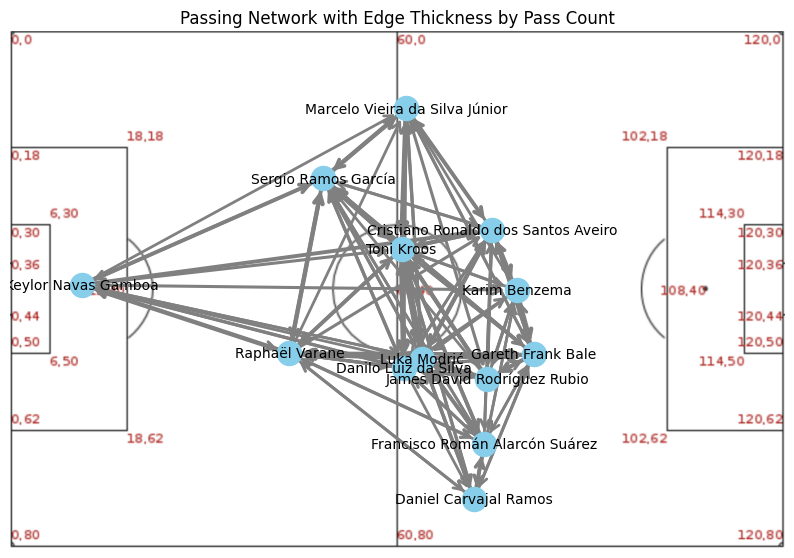

In [459]:
gh, datah = network_creation(df_network[df_network["team"]==home])
network_viz(datah,gh)

[True]
[True]


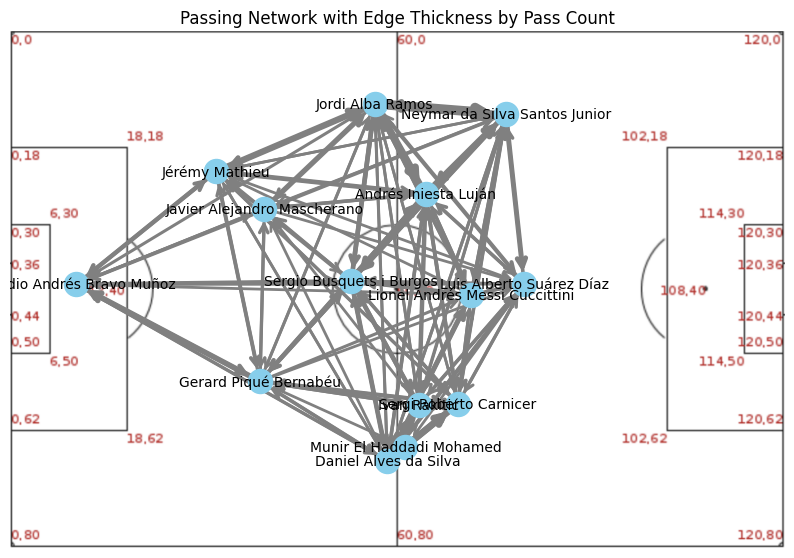

In [460]:
ga, dataa = network_creation(df_network[df_network["team"]==away])
network_viz(dataa,ga)

In [479]:
agg_players(datah,1).sort_values(by='pass_succes_count', ascending=False).head()


,player,team,position_<lambda>,pass_length_mean,pass_progression_mean,possession_time_sum,possession_time_mean,InSequenceID_mean,time_past_mean,degree_c_mean,...,shot_statsbomb_xg_shotFromPass_sum,SequenceXG_sum,SequenceBuildUpXG_sum,pass_succes_count,f3rd_pass_sum,shot_assisted_pass_sum,goal_assisted_pass_sum,cross_sum,box_pass_sum,match_id_mean
12,Toni Kroos,Real Madrid,Left Defensive Midfield,20.338820,-1.114925,1966.208,29.346388,4.074627,8.102940,1.916667,...,0.000000,0.834341,0.834341,67,5,0,0,1,2,266424.0
8,Luka Modrić,Real Madrid,Right Defensive Midfield,17.443953,-3.866667,1483.977,27.481056,3.814815,7.680926,1.916667,...,0.054643,0.247957,0.193315,54,8,2,0,0,0,266424.0
10,Raphaël Varane,Real Madrid,Right Center Back,21.844059,-3.832353,910.125,26.768382,2.941176,5.069853,1.583333,...,0.000000,0.225754,0.225754,34,2,0,0,0,0,266424.0
2,Danilo Luiz da Silva,Real Madrid,Right Back,18.426864,-2.093939,956.628,28.988727,3.696970,7.663152,1.750000,...,0.000000,0.143623,0.143623,33,1,0,0,0,0,266424.0
11,Sergio Ramos García,Real Madrid,Left Center Back,21.728836,-6.606061,983.803,29.812212,4.060606,8.554667,1.583333,...,0.485899,0.485899,0.000000,33,4,2,0,0,1,266424.0


In [468]:
agg_players(datah,1)["player"].unique()

array(['Cristiano Ronaldo dos Santos Aveiro', 'Daniel Carvajal Ramos',
       'Danilo Luiz da Silva', 'Francisco Román Alarcón Suárez',
       'Gareth Frank Bale', 'James David Rodríguez Rubio',
       'Karim Benzema', 'Keylor Navas Gamboa', 'Luka Modrić',
       'Marcelo Vieira da Silva Júnior', 'Raphaël Varane',
       'Sergio Ramos García', 'Toni Kroos'], dtype=object)

In [469]:

TK = df_network[(df_network["player"]=="Toni Kroos")&(df_network["pass_succes"].notna())]
TK["pass_succes"].sum()

67

In [474]:
TK2 = agg_players(datah,1)
TK2 = TK2[TK2["player"]=="Toni Kroos"]
TK2

,player,team,position_<lambda>,pass_length_mean,pass_progression_mean,possession_time_sum,possession_time_mean,InSequenceID_mean,time_past_mean,degree_c_mean,...,SequenceBuildUpXG_sum,pass_succes_sum,pass_succes_<lambda_0>,f3rd_pass_sum,shot_assisted_pass_sum,goal_assisted_pass_sum,cross_sum,box_pass_sum,match_id_mean,pass_rate
12,Toni Kroos,Real Madrid,Left Defensive Midfield,20.33882,-1.114925,1966.208,29.346388,4.074627,8.10294,1.916667,...,0.834341,67,67,5,0,0,1,2,266424.0,0.034076


In [339]:
agg_players(dataa,1).head(5)

,player,team,position,pass_length,pass_progression,possession_time,InSequenceID,time_past,degree_c,eigen_c,...,SequenceXG,SequenceBuildUpXG,pass_succes,f3rd_pass,shot_assisted_pass,goal_assisted_pass,cross,box_pass,match_id,pass_rate
0,André Filipe Tavares Gomes,Valencia,Left Midfield,18.102683,-2.230000,371.950,3.350000,6.610500,1.769231,0.383359,...,0.050477,0.000000,20,2,2,0,0,0,266557.0,0.053771
1,Antonio Barragán Fernández,Valencia,Right Back,17.342221,1.000000,14063.089,2.565217,3.881000,1.153846,0.255179,...,0.013871,0.013871,23,3,0,0,0,0,266557.0,0.001635
2,Aymen Abdennour,Valencia,Left Center Back,22.209406,0.727273,2923.707,2.363636,3.770273,0.846154,0.241090,...,0.013871,0.013871,11,1,0,0,0,0,266557.0,0.003762
3,Daniel Parejo Muñoz,Valencia,Right Center Midfield,19.014258,-4.592857,8933.403,3.285714,6.530893,1.538462,0.350183,...,0.108201,0.013871,28,5,1,0,0,0,266557.0,0.003134
4,Diego Alves Carreira,Valencia,Goalkeeper,55.474383,-49.056250,210.865,1.312500,1.138500,1.000000,0.195194,...,0.000000,0.000000,16,2,0,0,0,0,266557.0,0.075878


In [365]:
result=pd.DataFrame()

for i in pdf["match_id"].unique():
    df_network = pdf[pdf["match_id"]==i].copy()
    home = df_network["home_team"].unique()[0]
    away = df_network["away_team"].unique()[0]
    gh, datah = network_creation(df_network[df_network["team"]==home])
    ga, dataa = network_creation(df_network[df_network["team"]==away])
    result= pd.concat([result,agg_players(datah,1),agg_players(dataa,1)],ignore_index=True)



In [327]:
pdf["player"].unique().shape

(538,)

In [377]:
result.sort_values(by='player', ascending=False)

,player,team,position_<lambda>,pass_length_mean,pass_progression_mean,possession_time_sum,possession_time_mean,InSequenceID_mean,time_past_mean,degree_c_mean,...,SequenceBuildUpXG_sum,pass_succes_sum,pass_succes_count,f3rd_pass_sum,shot_assisted_pass_sum,goal_assisted_pass_sum,cross_sum,box_pass_sum,match_id_mean,pass_rate
3540,Óscar de Marcos Arana,Athletic Club,Right Back,17.112666,0.284783,969.329,21.072370,2.630435,5.792196,1.538462,...,1.077720,46,46,5,0,0,1,2,3825703.0,0.047456
5687,Óscar de Marcos Arana,Athletic Club,Right Back,17.187745,2.547826,1187.089,25.806283,2.608696,5.869043,1.461538,...,0.083317,46,46,4,0,0,1,2,3825877.0,0.03875
4700,Óscar de Marcos Arana,Athletic Club,Right Back,18.071414,2.104545,523.553,23.797864,1.590909,1.499955,1.230769,...,0.122322,22,22,0,3,0,2,2,3825659.0,0.042021
2657,Óscar de Marcos Arana,Athletic Club,Right Back,19.149364,-0.331429,9037.186,258.205314,2.857143,5.796571,1.846154,...,0.084361,35,35,5,0,0,1,2,3825783.0,0.003873
3389,Óscar de Marcos Arana,Athletic Club,Right Back,21.016167,-8.124000,490.580,19.623200,1.680000,2.053080,1.000000,...,0.064097,25,25,4,0,0,0,1,3825706.0,0.05096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,Abdoul Karim Yoda,Getafe,Left Back,18.633335,0.413333,558.352,37.223467,2.466667,4.444400,0.846154,...,0.000000,15,15,0,0,0,0,1,3825899.0,0.026865
1025,Abdoul Karim Yoda,Getafe,Left Back,16.752511,-9.313514,1007.428,27.227784,3.108108,6.743189,1.583333,...,0.092468,37,37,2,2,0,1,0,3825833.0,0.036727
1957,Abdoul Karim Yoda,Getafe,Left Back,17.514132,-7.607692,3660.915,93.869615,3.102564,6.125795,1.384615,...,0.017480,39,39,6,1,0,1,2,3825867.0,0.010653
3251,Abdoul Karim Yoda,Getafe,Left Back,17.844074,-2.306410,4163.561,53.378987,5.064103,12.097872,1.692308,...,0.227113,78,78,7,1,0,0,3,3825774.0,0.018734


In [375]:
result.columns

Index(['player', 'team', 'position_<lambda>', 'pass_length_mean',
       'pass_progression_mean', 'possession_time_sum', 'possession_time_mean',
       'InSequenceID_mean', 'time_past_mean', 'degree_c_mean', 'eigen_c_mean',
       'closeness_c_mean', 'betweenness_c_mean', 'pass_recipient_<lambda>',
       'pass_recipient_position_<lambda>',
       'shot_statsbomb_xg_shotFromPass_sum', 'SequenceXG_sum',
       'SequenceBuildUpXG_sum', 'pass_succes_sum', 'pass_succes_count',
       'f3rd_pass_sum', 'shot_assisted_pass_sum', 'goal_assisted_pass_sum',
       'cross_sum', 'box_pass_sum', 'match_id_mean', 'pass_rate'],
      dtype='object')

In [388]:
# Aggregation dictionary
agg_dict = {
    'position_<lambda>': lambda x: x.mode()[0] if not x.mode().empty else None,
    'pass_length_mean': 'mean',
    'pass_progression_mean': 'mean',
    "possession_time_mean": 'mean',
    "possession_time_sum":'sum',
    'InSequenceID_mean': 'mean',
    'time_past_mean': 'mean',
    'degree_c_mean': 'mean',
    'eigen_c_mean': 'mean',
    'closeness_c_mean': 'mean',
    'betweenness_c_mean': 'mean',
    'pass_recipient_<lambda>': lambda x: x.mode()[0] if not x.mode().empty else None,
    'pass_recipient_position_<lambda>': lambda x: x.mode()[0] if not x.mode().empty else None,
    'shot_statsbomb_xg_shotFromPass_sum': 'sum',
    'SequenceXG_sum': 'sum',
    'SequenceBuildUpXG_sum': 'sum',
    "pass_succes_sum": 'sum',
    "pass_succes_count":'sum',
    'f3rd_pass_sum': 'sum',
    'shot_assisted_pass_sum': 'sum',
    'goal_assisted_pass_sum': 'sum',
    'cross_sum': 'sum',
    'box_pass_sum': 'sum',
    'match_id_mean': 'nunique'  # Unique count of match IDs

}

by_player = result.groupby(["player","team"]).agg(agg_dict)

# Reset the index for better readability
by_player = by_player.reset_index()
by_player.columns


Index(['player', 'team', 'position_<lambda>', 'pass_length_mean',
       'pass_progression_mean', 'possession_time_mean', 'possession_time_sum',
       'InSequenceID_mean', 'time_past_mean', 'degree_c_mean', 'eigen_c_mean',
       'closeness_c_mean', 'betweenness_c_mean', 'pass_recipient_<lambda>',
       'pass_recipient_position_<lambda>',
       'shot_statsbomb_xg_shotFromPass_sum', 'SequenceXG_sum',
       'SequenceBuildUpXG_sum', 'pass_succes_sum', 'pass_succes_count',
       'f3rd_pass_sum', 'shot_assisted_pass_sum', 'goal_assisted_pass_sum',
       'cross_sum', 'box_pass_sum', 'match_id_mean'],
      dtype='object')

In [389]:
# Calculate pass success per total possession time
by_player['pass_rate_pP'] = by_player['pass_succes_sum'] / by_player['possession_time_sum']
by_player['succesful_pass_rate_pG'] = by_player['pass_succes_sum'] / by_player['match_id_mean']
by_player['pass%'] = by_player['pass_succes_sum'] / by_player['pass_succes_count']


# Display the result
by_player.sort_values(by='pass_succes_sum', ascending=False)

,player,team,position_<lambda>,pass_length_mean,pass_progression_mean,possession_time_mean,possession_time_sum,InSequenceID_mean,time_past_mean,degree_c_mean,...,pass_succes_count,f3rd_pass_sum,shot_assisted_pass_sum,goal_assisted_pass_sum,cross_sum,box_pass_sum,match_id_mean,pass_rate_pP,succesful_pass_rate_pG,pass%
499,Toni Kroos,Real Madrid,Center Defensive Midfield,21.285740,-4.319325,77.473414,171198.591,4.910807,10.800201,1.762147,...,2330,256,55,0,9,16,32,0.01361,72.8125,1.0
435,Roberto Trashorras Gayoso,Rayo Vallecano,Right Defensive Midfield,21.784636,-3.884978,38.490673,86000.104,3.398891,7.305027,1.746795,...,2190,256,64,0,18,61,36,0.025465,60.833333,1.0
469,Sergio Busquets i Burgos,Barcelona,Center Defensive Midfield,19.202088,-3.047014,88.370257,197674.322,5.167239,12.798393,1.692880,...,2182,234,18,0,3,10,35,0.011038,62.342857,1.0
337,Luka Modrić,Real Madrid,Right Center Midfield,18.825743,-4.085846,63.613003,130067.508,5.434982,12.450286,1.655540,...,2026,257,63,0,7,28,32,0.015577,63.3125,1.0
271,Jordi Alba Ramos,Barcelona,Left Back,16.163836,-1.034501,70.735096,145939.209,5.202785,12.674453,1.526209,...,2005,133,22,0,19,29,31,0.013739,64.677419,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Chengdong Zhang,Rayo Vallecano,Left Center Back,19.668425,15.700000,37.039000,74.078,2.000000,3.116000,0.307692,...,2,0,0,0,0,0,1,0.026999,2.0,1.0
394,Néstor Díaz García,Celta Vigo,Goalkeeper,46.951617,-38.100000,23.367500,46.735,3.500000,17.477000,0.250000,...,2,0,0,0,0,0,1,0.042794,2.0,1.0
141,Douglas Pereira dos Santos,Barcelona,Right Back,12.184545,8.900000,8.543000,17.086,2.500000,4.304500,0.307692,...,2,0,0,0,0,0,1,0.117055,2.0,1.0
204,Hachim Mastour,Málaga,Center Attacking Midfield,21.446210,-6.300000,45.056000,45.056,2.000000,5.476000,0.230769,...,1,False,False,False,False,False,1,0.022195,1.0,1.0


In [386]:
TK = pdf[pdf["player"]=="Toni Kroos"]


In [280]:
TK["match_id"].unique().shape

(32,)

In [390]:
TK2 = by_player[by_player["player"]=="Toni Kroos"]
TK2[["pass_succes_sum","pass_succes_count"]]

,pass_succes_sum,pass_succes_count
499,2330,2330


In [31]:
con.close()
